In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Restaurant Review Using NLP/Restaurant_Reviews.tsv",delimiter='\t')

In [4]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ',data['Review'][i])
    reviwe=review.lower()
    review=review.split()
    ps=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    review=[ps.stem(word) for word in review if not word in set(all_stopwords)]
    review=' '.join(review)
    corpus.append(review)

In [7]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'the select menu great price',
 'now i get angri i want damn pho',
 'honeslti tast that fresh',
 'the potato like rubber could tell made ahead time kept warmer',
 'the fri great',
 'a great touch',
 'servic prompt',
 'would not go back',
 'the cashier care ever i say still end wayyy overpr',
 'i tri cape cod ravoli chicken cranberri mmmm',
 'i disgust i pretti sure human hair',
 'i shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'thi place not worth time let alon vega',
 'not like',
 'the burritto blah',
 'the food amaz',
 'servic also cute',
 'i could care less the interior beauti',
 'so perform',
 'that right red velvet cake ohhh stuff good',
 'they never brought salad ask',
 'thi hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm our sever run around like total overwhelm',
 'the wors

Now we will use three different type of models to predict the output :Naive Base, Logistic Regression and Decision Tree Classifier and will try to analyze their accuracy by varying the no. of features.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Arrays made to store the accuracies
nb_acc=[]
lr_acc=[]
dtc_acc=[]

for i in range(500,5001,500):
    cv=CountVectorizer(max_features=i) #Changing the max features using for loop
    X=cv.fit_transform(corpus).toarray()
    Y=data.iloc[:,-1].values
    print("When max_features =",i)
    print("X \n",X)
    print("Y \n",Y)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

    gnb=GaussianNB()
    gnb.fit(X_train,Y_train)
    Y_pred1=gnb.predict(X_test)
    # print(Y_pred1)
    cm1=confusion_matrix(Y_test,Y_pred1)
    print("Naive Bayes Confusion Matrix \n",cm1)
    nb_acc.append(accuracy_score(Y_test,Y_pred1))


    logistic_model=LR()
    logistic_model.fit(X_train,Y_train)
    Y_pred2=logistic_model.predict(X_test)
    # print(Y_pred2)
    cm2=confusion_matrix(Y_test,Y_pred2)
    print("Logistic Regression confusion matrix \n",cm2)
    lr_acc.append(accuracy_score(Y_test,Y_pred2))

    decision_model=DTC()
    decision_model.fit(X_train,Y_train)
    Y_pred3=decision_model.predict(X_test)
    # print(Y_pred3)
    cm3=confusion_matrix(Y_test,Y_pred3)
    print("Decision Tree Classifier Confusion matrix \n",cm3)
    dtc_acc.append(accuracy_score(Y_test,Y_pred3))
    print("---------------------------------------------------------------")

When max_features = 500
X 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Y 
 [1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 

In [10]:
db={"Max Features":[i for i in range(500,5001,500)],"Naive Bayes Accuracy":nb_acc,"Logistic Regression Accuracy":lr_acc,"Decision Tree Classifier Accuracy":dtc_acc }
pd.DataFrame(db)

,Max Features,Naive Bayes Accuracy,Logistic Regression Accuracy,Decision Tree Classifier Accuracy
0,500,0.655,0.800,0.760
1,1000,0.670,0.775,0.780
2,1500,0.650,0.790,0.760
3,2000,0.650,0.820,0.795
4,2500,0.675,0.810,0.745
5,3000,0.660,0.830,0.770
6,3500,0.705,0.825,0.770
7,4000,0.715,0.780,0.750
8,4500,0.715,0.850,0.780
9,5000,0.630,0.775,0.770


[]

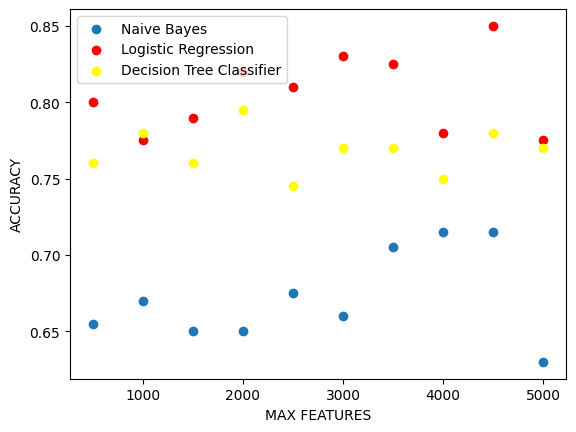

In [11]:
import matplotlib.pyplot as plt
max_features=[i for i in range(500,5001,500)]
plt.scatter(max_features,nb_acc)
plt.scatter(max_features,lr_acc,color="Red")
plt.scatter(max_features,dtc_acc,color="Yellow")
plt.xlabel("MAX FEATURES")
plt.ylabel("ACCURACY")
plt.legend(["Naive Bayes","Logistic Regression","Decision Tree Classifier"])
plt.plot()

Thus, accuracy : Logistic Regression > Decision Tree Classifier > Naive  Bayes

#Deployment

In [15]:

cv=CountVectorizer(max_features=500) #Changing the max features using for loop
X=cv.fit_transform(corpus).toarray()
import pickle
pickle.dump(cv, open("/content/drive/MyDrive/Restaurant Review Using NLP/Count_Vectorizer.pkl","wb"))
Y=data.iloc[:,-1].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

logistic_model=LR()
logistic_model.fit(X_train,Y_train)


LogisticRegression()

In [16]:
import pickle
pickle.dump(logistic_model, open("/content/drive/MyDrive/Restaurant Review Using NLP/review_model.pkl","wb"))